In [6]:
from bs4 import BeautifulSoup as bs
from splinter import Browser
import time
import datetime
import pandas as pd
import lxml

In [7]:
#gets alt tags for images that are otherwise given in table as NaN, for levels and country
def getAlt(x):
    for img in x.find_all('img'):
        if(img.get("alt")):
#             print(img.get("alt"))
            img.string = img.get("alt")

#copied code from scrape_mars.py
def getCountryData():
    url = "https://achievementstats.com/index.php?action=countries"

    executable_path = {'executable_path': 'chromedriver.exe'}
    browser = Browser('chrome', **executable_path, headless=False)

    browser.visit(url)
    
    #add a delay so page fully loads
    time.sleep(6)
    
    
    #start collecting data
    
        
    try:
        current_leaderboard = browser.html

        news_soup = bs(current_leaderboard, "html.parser")

        top_scorers = news_soup.find_all("table")[0]
#             print(top_scorers.prettify())
        getAlt(top_scorers)

        #if(i == 0):
        #else:
            #output = output.append(pd.read_html(top_scorers.prettify(), header=0, flavor="bs4")[0], ignore_index=True)
        curr_rank = int(browser.find_by_tag('tr').last.find_by_tag("td").first.text)
        print(curr_rank, lowest_rank)
        browser.find_by_tag('tr').last.click()
    except:
#             print("Missing page #{} of 100".format(i))
        print("Error loading, try again!")

    #read output at the end, only once!
    output = pd.read_html(top_scorers.prettify(), header=0, flavor="bs4")[0]
    
    browser.quit()

    return output

In [8]:
#should get whole page/table with in one go!
output_df = getCountryData()
output_df

Error loading, try again!


,Rank,Country,Players,Points,Number,Games,Badges,XP,Hours
0,0,Unknown,118487,80820883.48,127002717,29117648,5168616,2141390389,370195328.5
1,1,United States,54305,47979566.15,77406751,18931455,2453372,935132654,214073268.7
2,2,Russian Federation,29151,25380563.42,37680967,7099883,1624289,686426354,99314574.7
3,3,Germany,19837,16717946.58,26047887,6191048,1322410,566074775,78864614.9
4,4,United Kingdom (Great Britain),15075,14495523.36,23319182,5451881,756080,280635406,62780618.4
...,...,...,...,...,...,...,...,...,...
248,248,Mauritania,9,3122.43,5475,768,143,43192,24425.2
249,249,French Guiana,8,2567.70,5418,1111,92,17904,21487.8
250,250,Anguilla,16,2086.18,5009,774,195,46729,23037.5
251,251,"Moldova, Republic of",2,589.10,752,129,116,17486,1939.9


In [9]:
output_df.to_csv("./country_data.csv", index=False)

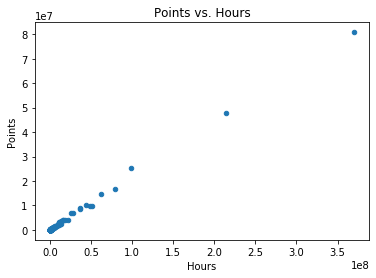

In [10]:
temp_axes1 = output_df.plot(kind="scatter", x="Hours", 
                                       y="Points", 
                                       title="Points vs. Hours")

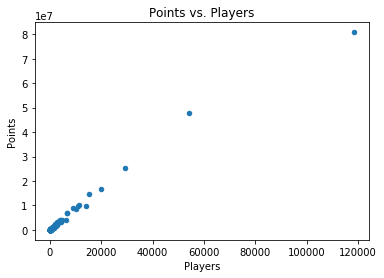

In [11]:
temp_axes2 = output_df.plot(kind="scatter", x="Players", 
                                       y="Points", 
                                       title="Points vs. Players")

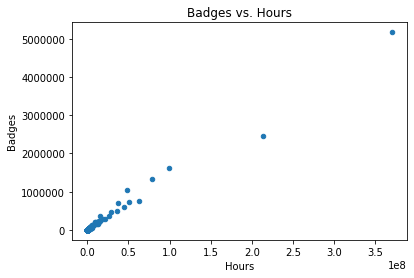

In [12]:
temp_axes3 = output_df.plot(kind="scatter", x="Hours", 
                                       y="Badges", 
                                       title="Badges vs. Hours")

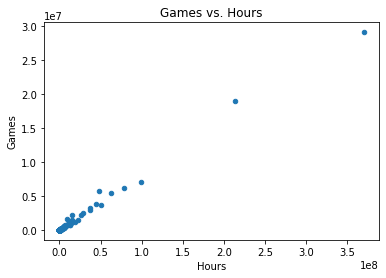

In [13]:
temp_axes4 = output_df.plot(kind="scatter", x="Hours", 
                                       y="Games", 
                                       title="Games vs. Hours")

In [14]:
# TODO: Examine relationship between columns - looks like linear regression might fit most of the data now that it is aggregated
# We can get the relationships between hours played/number of players and the other columns to predict the average rate of 
# progress on steam (e.g. achievements per hour, badges per hour, XP per hour, etc. as well as the averages by country - like
# games per player, points per player)